## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import joblib

## Load the datasets

In [2]:
X_train = pd.read_csv("train.csv")

In [3]:
X_train.head()

,mean,sd
0,0.564877,0.231592
1,-0.118285,0.020446
2,-0.157953,-0.106749
3,-0.157953,-0.106749
4,-0.157953,-0.106242


In [4]:
X_test = pd.read_csv("test.csv")

In [5]:
X_test.head()

,mean,sd
0,-0.157953,-0.106749
1,-0.157953,-0.106749
2,-0.157953,-0.106242
3,-0.284889,-0.106749
4,-0.157953,-0.106242


## Train the Isolation Forest model

In [6]:
clf = IsolationForest(random_state = 16)
clf.fit(X_train)

IsolationForest(random_state=16)

An isolation forest isolates the anomalous points from the non-anomalous points. In layman's terms, we could say that it builds a frontier that separates these anomalous points from the non-anomalous points. This frontier is sometimes known as the decision boundary or decision function, and we can obtain it by using as a proxy the anomaly scores obtained with the method model.decision_function() and the input samples.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


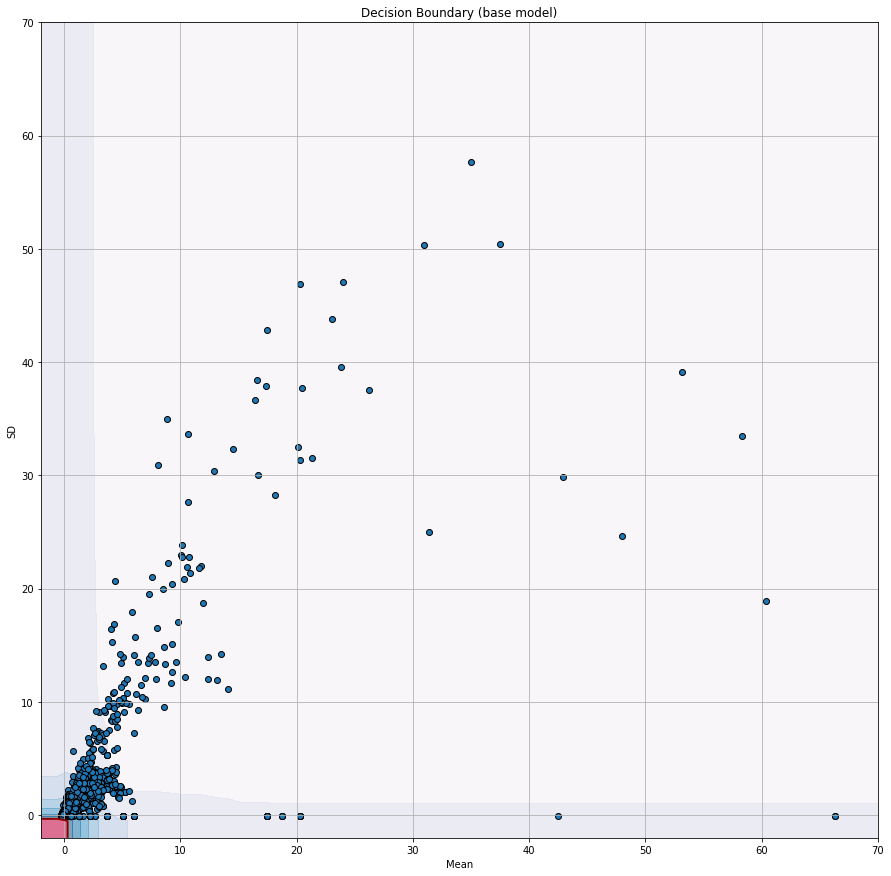

In [7]:
# Plot the decision boundaries
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

## Retrain the model to increase decision boundary

In [8]:
# set contamination hyperparameter to 0.001 
clf = IsolationForest(contamination = 0.001, random_state = 16)
clf.fit(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


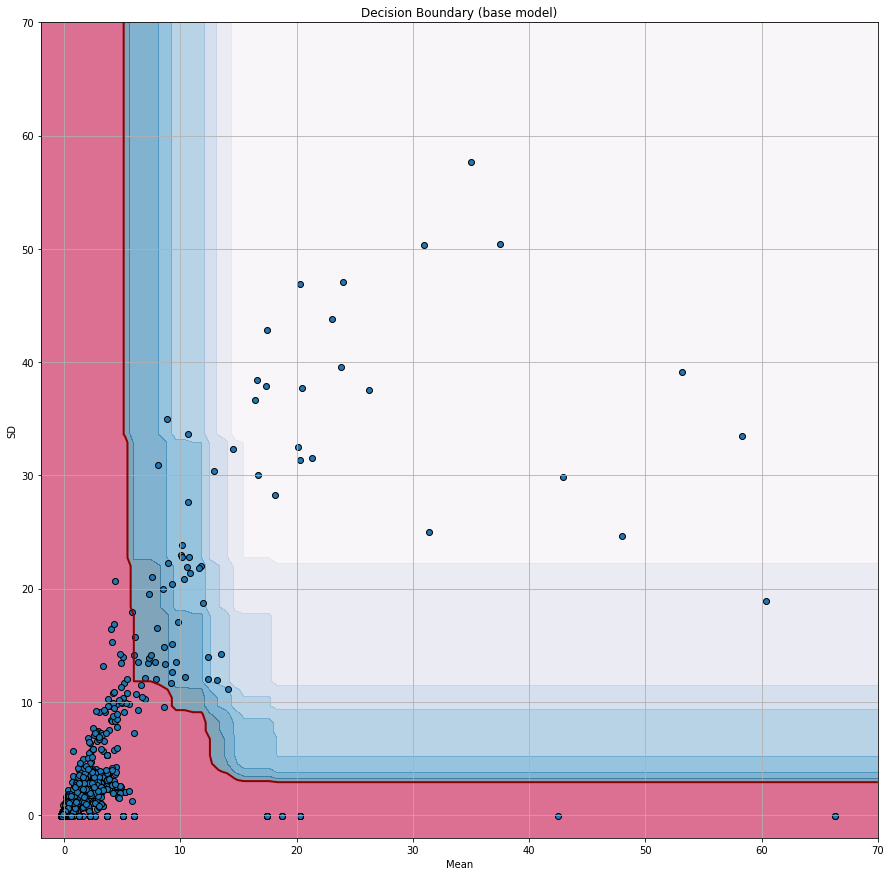

In [9]:
# Plot the decision boundaries
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

## Make predictions for the test data

In [10]:
test_predictions = clf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
# Merge the test data with the predictions for it
X_test_with_pred = pd.concat([X_test, pd.Series(test_predictions)], axis = 1)
X_test_with_pred.columns = ['mean', 'sd', 'pred']

In [12]:
X_test_with_pred.head()

,mean,sd,pred
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1


/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


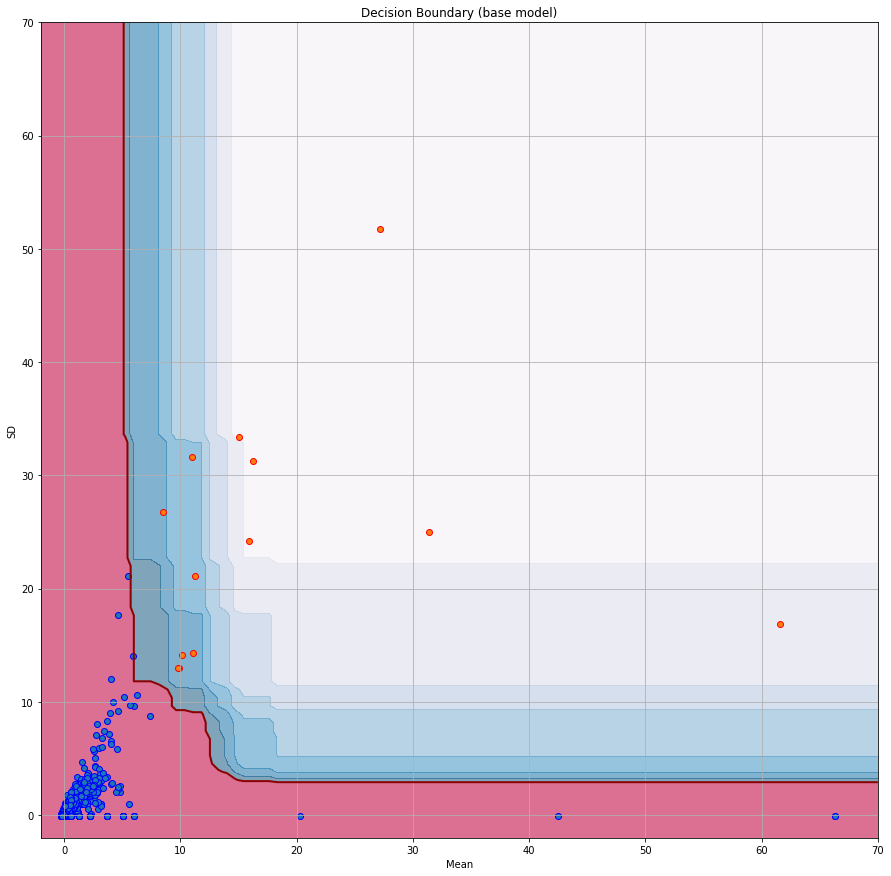

In [13]:
# Plot the decision boundaries
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
# draw predicted inliers and predicted outliers
inlier = X_test_with_pred[X_test_with_pred["pred"] == 1]
outlier = X_test_with_pred[X_test_with_pred["pred"] == -1]
plt.scatter(inlier.iloc[:, 0],
            inlier.iloc[:, 1],
            edgecolors='b')
plt.scatter(outlier.iloc[:, 0],
            outlier.iloc[:, 1],
            edgecolors='r')
# add labels
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.savefig("boundary_test_data.png")
plt.show()

## Export the model

In [14]:
joblib.dump(clf, 'isoforest.joblib')

['isoforest.joblib']